### Datasets Analyzed
- TN movie budgets
- TMDB movies

# Q2 - What are the top 10 most popular and highest rated films? Is there a relationship between popularity and highest rated?

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Import TMDB Movies Dataset

In [3]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', 
                          compression='gzip', 
                          header=0, 
                          sep=',', 
                          quotechar='"', 
                          error_bad_lines=False, 
                          index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


### Filtered dataset higher than 190 vote counts and movies for 2010 - 2020

We filtered for movies that had above the average vote count of 190 to exclude movies that have high voting averages with low vote counts. We analyzed only movies released in the past 10 years due to box office numbers being a lot lower in previous decades which may drag the average box office numbers down.

In [5]:
#Find the average vote count for all movies in the past 10 years
tmdb_movies.loc[tmdb_movies['release_date'] > '2010-01-01'].describe()

,id,popularity,vote_average,vote_count
count,26022.000000,26022.000000,26022.000000,26022.000000
mean,298230.630620,3.113565,5.992253,189.232726
std,152145.893323,4.319625,1.851955,943.796552
min,189.000000,0.600000,0.000000,1.000000
25%,164657.750000,0.600000,5.000000,2.000000
50%,314128.000000,1.377500,6.000000,5.000000
75%,421398.250000,3.684500,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [6]:
#filter the tmdb movies with vote count above 190 and release date after 2010
filtered_tmdb_movies = tmdb_movies.loc[(tmdb_movies['vote_count'] > 190) & 
                                       (tmdb_movies['release_date'] > '2010-01-01'), 
                                       ['original_title','popularity','vote_average','release_date']]
filtered_tmdb_movies.head()

,original_title,popularity,vote_average,release_date
0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,2010-11-19
1,How to Train Your Dragon,28.734,7.7,2010-03-26
2,Iron Man 2,28.515,6.8,2010-05-07
4,Inception,27.920,8.3,2010-07-16
5,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,2010-02-11


### Removed Duplicates from Dataset

In [7]:
#Find the total number of duplicates based on title
print('Number of Duplicates:', filtered_tmdb_movies['original_title'].duplicated().sum())

Number of Duplicates: 241


In [8]:
#Drop duplicates
filtered_tmdb_movies.drop_duplicates(inplace=True)

#Check duplicates were dropped
print('Duplicates Remaining:', filtered_tmdb_movies.duplicated().sum())

Duplicates Remaining: 0


### Descriptive Statistics for Popularity & Vote Average

In [9]:
filtered_tmdb_movies.describe()

,popularity,vote_average
count,2412.000000,2412.000000
mean,12.376893,6.404643
std,6.722986,0.818312
min,0.600000,3.700000
25%,8.236500,5.900000
50%,10.322000,6.400000
75%,14.377250,7.000000
max,80.773000,8.600000


### Top 10 Most Popular Movies 2010 - 2020

At a quick glance between the top 10 Popular Movies and top 10 Highly Rated Movies, not all of the movies are the same. We can assume that Popularity and Highly Rated will not have a strong positive correlation.

In [10]:
top_10_popularity = filtered_tmdb_movies.loc[:,['original_title'
                                                ,'popularity']].sort_values(by='popularity',
                                                                            ascending=False).head(10)
display(top_10_popularity)

,original_title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057
20618,Spider-Man: Homecoming,46.775


### Merged the Top 10 Popularity to get the Genres from IMDB Title Basics

In [11]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', 
                                compression='gzip', 
                                header=0, 
                                sep=',', 
                                quotechar='"', 
                                error_bad_lines=False)

top_10_popularity_genre = pd.merge(top_10_popularity, imdb_title_basics, 
                how='inner', right_on=['original_title'], left_on=['original_title'])
top_10_popularity_genre

,original_title,popularity,tconst,primary_title,start_year,runtime_minutes,genres
0,Avengers: Infinity War,80.773,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
1,John Wick,78.123,tt2911666,John Wick,2014,101.0,"Action,Crime,Thriller"
2,Spider-Man: Into the Spider-Verse,60.534,tt4633694,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation"
3,The Hobbit: The Battle of the Five Armies,53.783,tt2310332,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy"
4,The Avengers,50.289,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
5,Guardians of the Galaxy,49.606,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
6,Blade Runner 2049,48.571,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi"
7,Fantastic Beasts: The Crimes of Grindelwald,48.508,tt4123430,Fantastic Beasts: The Crimes of Grindelwald,2018,134.0,"Adventure,Family,Fantasy"
8,Ralph Breaks the Internet,48.057,tt5848272,Ralph Breaks the Internet,2018,112.0,"Adventure,Animation,Comedy"
9,Spider-Man: Homecoming,46.775,tt2250912,Spider-Man: Homecoming,2017,133.0,"Action,Adventure,Sci-Fi"


Text(0.5, 0, 'Gross Profit (In Billions) Based on Highest Popular Movies')

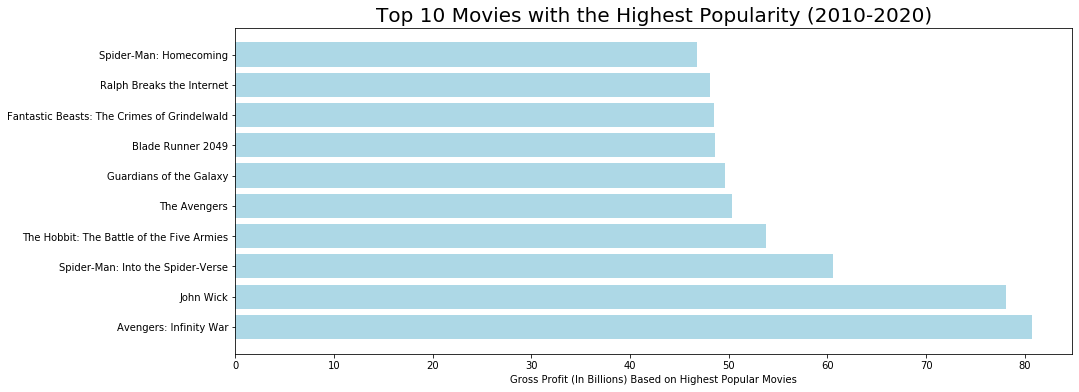

In [12]:
plt.figure(figsize=(15,6))
plt.barh(top_10_popularity['original_title'],top_10_popularity['popularity'],color='lightblue')

plt.title('Top 10 Movies with the Highest Popularity (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions) Based on Highest Popular Movies')

### Top 10 Most Highly Rated Movies 2010 - 2020

In [13]:
top_10_vote_average = filtered_tmdb_movies.loc[:,['original_title',
                                                  'vote_average']].sort_values(by='vote_average',
                                                                               ascending=False).head(10)
display(top_10_vote_average)

,original_title,vote_average
17389,君の名は。,8.6
11031,Whiplash,8.4
23899,کفرناحوم,8.4
23812,Spider-Man: Into the Spider-Verse,8.4
21008,In a Heartbeat,8.3
23827,Green Book,8.3
24056,Won't You Be My Neighbor?,8.3
17466,아가씨,8.3
11142,Mommy,8.3
23811,Avengers: Infinity War,8.3


### Merged the Top 10 Highest Rated to get the Genres from IMDB Title Basics

In [14]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', 
                                compression='gzip', 
                                header=0, 
                                sep=',', 
                                quotechar='"', 
                                error_bad_lines=False)

top_10_voteaverage_genre = pd.merge(top_10_vote_average, imdb_title_basics, 
                how='inner', right_on=['original_title'], left_on=['original_title'])
top_10_voteaverage_genre

,original_title,vote_average,tconst,primary_title,start_year,runtime_minutes,genres
0,Whiplash,8.4,tt2582802,Whiplash,2014,106.0,"Drama,Music"
1,Spider-Man: Into the Spider-Verse,8.4,tt4633694,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation"
2,In a Heartbeat,8.3,tt2622988,In a Heartbeat,2014,106.0,"Horror,Mystery,Romance"
3,Green Book,8.3,tt6966692,Green Book,2018,130.0,"Biography,Comedy,Drama"
4,Won't You Be My Neighbor?,8.3,tt7681902,Won't You Be My Neighbor?,2018,94.0,"Biography,Documentary"
5,Mommy,8.3,tt3612616,Mommy,2014,139.0,Drama
6,Mommy,8.3,tt5152894,Mommy,2015,135.0,Drama
7,Avengers: Infinity War,8.3,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


Text(0.5, 0, 'Gross Profit (In Billions)')

C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from c

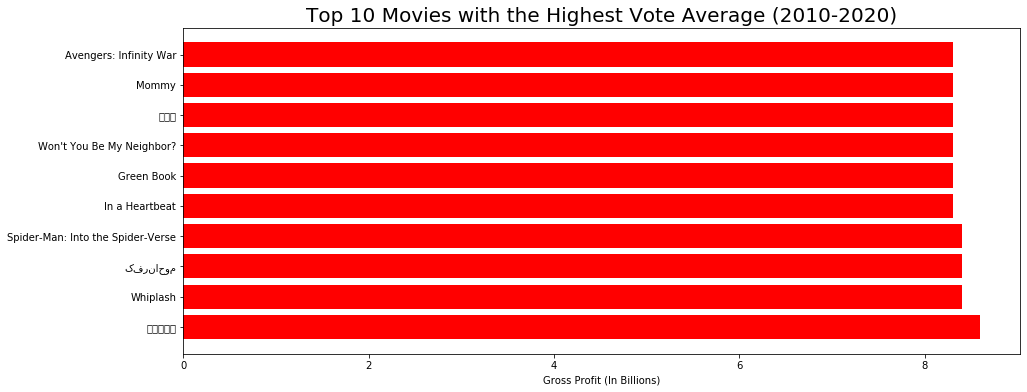

In [38]:
plt.figure(figsize=(15,6))
plt.barh(top_10_vote_average['original_title'],top_10_vote_average['vote_average'],color='red')

plt.title('Top 10 Movies with the Highest Vote Average (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions) Based on Highest Average Voted Movies')

In [16]:
## Subplots for Most Popular and Highly Rated Movies 2010-2020

# new_figure = plt.figure(figsize=(20,6))

# ax = new_figure.add_subplot(121)
# ax2 = new_figure.add_subplot(122)

# ax.barh(top_10_popularity['original_title'],top_10_popularity['popularity'] , color='lightblue')
# ax2.barh(top_10_vote_average['original_title'],top_10_vote_average['vote_average'], color='red')

# ax.set_xlim(0,100)
# ax.set_xlabel('Popularity',fontsize=15)
# ax.set_title('Top 10 Popular Movies (2010-2020)',fontsize=20)


# ax2.set_xlim(0,10)
# ax2.set_xlabel('Vote Average',fontsize=15)
# ax2.set_title('Top 10 Highest Rated Movies (2010-2020)',fontsize=20)

# plt.tight_layout()
# plt.show()

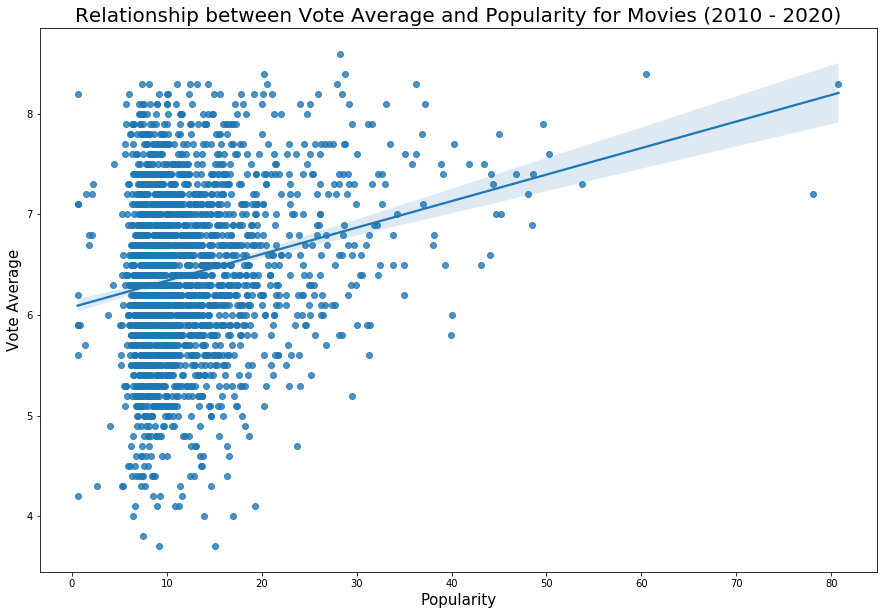

In [17]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
sns.regplot(x='popularity',y='vote_average',data=filtered_tmdb_movies)
plt.title('Relationship between Vote Average and Popularity for Movies (2010 - 2020)',fontsize=20)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel('Vote Average',fontsize=15)
plt.show()


In [18]:
correlation = filtered_tmdb_movies['popularity'].corr(filtered_tmdb_movies['vote_average'])
correlation

0.21661176140359314

### Q2  - Conclusion

Based on the popularity results, majority of the most popular movies are Action and Adventure movies. Action, Adventure movies is the best genre to release. As for the highest rated average results, majority of the highest rated movies are foreign films and Drama genre. If we're looking to create a film in a foreign country, Drama is the best genre to release.

When we looked at the correlation between Vote Average and Popularity, there was no correlation (0.22). For example, a popular movie does not necessarily lead to a highly rated movie but it can happen.

# Q3 - What are the top 10 movies with the highest gross profit margin? Is there a relationship between Popularity and Profit Margin?

### Import The Numbers Movie Budget Dataset

In [19]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', 
                               compression='gzip', 
                               header=0, 
                               sep=',', 
                               quotechar='"', 
                               error_bad_lines=False)

### Cleaning the Data

In [20]:
# we needed to convert the object columns (budget and gross) into integer values
# cleaned the object columns by removing the $ and , from each column
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype({'production_budget': 'int64'})
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','').astype({'domestic_gross': 'int64'})
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype({'worldwide_gross': 'int64'})


### Created New Column to Find the Gross Profit Margin

In [21]:
tn_movie_budgets['gross_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


### Filtered Data to Release Date After 2010

In [22]:
def change(x):
    return datetime.datetime.strptime(x,'%b %d %Y').strftime('%Y-%m-%d')

In [23]:
tn_movie_budgets['release_date'] = tn_movie_budgets['release_date'].str.replace(',','').apply(change)
tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets['release_date'] > '2010-01-01'] 

### Removed Duplicates

In [24]:
#Find the total number of duplicates based on title
print('Number of Duplicates:', tn_movie_budgets['movie'].duplicated().sum())

Number of Duplicates: 4


In [25]:
#Drop duplicates
tn_movie_budgets.drop_duplicates(inplace=True)

#Check duplicates were dropped
print('Duplicates Remaining:', tn_movie_budgets.duplicated().sum())

Duplicates Remaining: 0


### Merge the TMDB Database with TN Movie Budget Database

In [26]:
merged_data = pd.merge(filtered_tmdb_movies, tn_movie_budgets, 
                how='inner', right_on=['movie','release_date'], left_on=['original_title','release_date'])

In [27]:
#count of duplicates after joining
print('Number of Duplicates:', merged_data['original_title'].duplicated().sum())

Number of Duplicates: 1


In [28]:
merged_data['original_title'].drop_duplicates(inplace=True)
print('Duplicates Remaining:', merged_data['original_title'].duplicated().sum())

Duplicates Remaining: 0


In [29]:
merged_data.head()

,original_title,popularity,vote_average,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,How to Train Your Dragon,28.734,7.7,2010-03-26,30,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,Iron Man 2,28.515,6.8,2010-05-07,15,Iron Man 2,170000000,312433331,621156389,451156389
2,Inception,27.920,8.3,2010-07-16,38,Inception,160000000,292576195,835524642,675524642
3,Despicable Me,23.673,7.2,2010-07-09,50,Despicable Me,69000000,251513985,543464573,474464573
4,Alice in Wonderland,22.020,6.6,2010-03-05,51,Alice in Wonderland,200000000,334191110,1025491110,825491110


In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1028 non-null   object 
 1   popularity         1028 non-null   float64
 2   vote_average       1028 non-null   float64
 3   release_date       1028 non-null   object 
 4   id                 1028 non-null   int64  
 5   movie              1028 non-null   object 
 6   production_budget  1028 non-null   int64  
 7   domestic_gross     1028 non-null   int64  
 8   worldwide_gross    1028 non-null   int64  
 9   gross_profit       1028 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 88.3+ KB


### Descriptive Statistics for Vote Average and Gross Profit

In [31]:
pd.options.display.float_format = '{:.2f}'.format
round(merged_data.describe(),2)

,popularity,vote_average,id,production_budget,domestic_gross,worldwide_gross,gross_profit
count,1028.00,1028.00,1028.00,1028.00,1028.00,1028.00,1028.00
mean,14.77,6.38,51.19,52724594.02,67428142.50,170679620.70,117955026.68
std,7.98,0.78,28.73,58664335.25,90496828.26,250969660.03,208448622.84
min,0.60,4.00,1.00,100000.00,0.00,0.00,-110450242.00
25%,9.61,5.90,26.75,12575000.00,14098195.50,25586094.50,5660857.50
50%,12.78,6.40,51.00,30000000.00,37536535.50,77127940.50,41992603.00
75%,17.27,6.90,77.00,68250000.00,79929883.75,197523215.00,128998065.00
max,80.77,8.40,100.00,410600000.00,700059566.00,2048134200.00,1748134200.00


### Top 20 Profit Margin Movies (2010-2020)

In [32]:
top_10_grossprofit = merged_data.loc[:,['original_title',
                                        'gross_profit']].sort_values(by='gross_profit',
                                                                     ascending=False).head(10)
top_10_grossprofit.head(10)

,original_title,gross_profit
929,Avengers: Infinity War,1748134200
580,Jurassic World,1433854864
583,Furious 7,1328722794
222,The Avengers,1292935897
932,Black Panther,1148258224
941,Jurassic World: Fallen Kingdom,1135772799
830,Beauty and the Beast,1099199706
655,Minions,1086336173
563,Avengers: Age of Ultron,1072413963
939,Incredibles 2,1042520711


Text(0.5, 0, 'Gross Profit (In Billions) Based on Highest Profitable Movies')

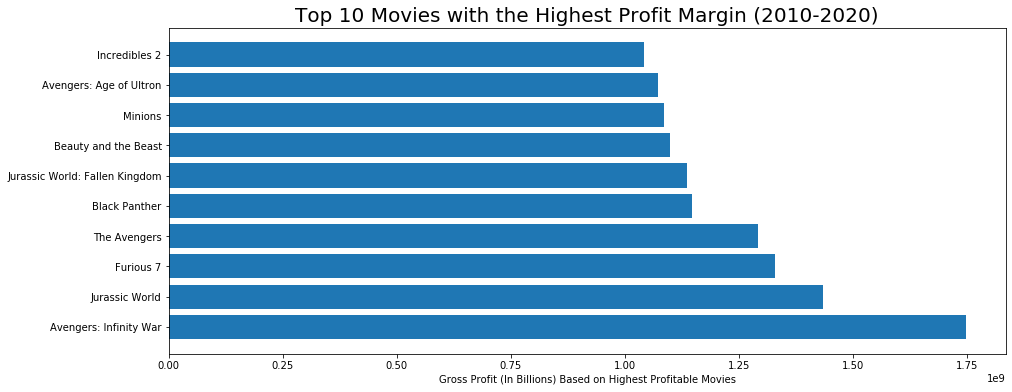

In [33]:
plt.figure(figsize=(15,6))
plt.barh(top_10_grossprofit['original_title'],top_10_grossprofit['gross_profit'])

plt.title('Top 10 Movies with the Highest Profit Margin (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions) Based on Highest Profitable Movies')

### Plotting Relationship between Vote Average and Profit Margin

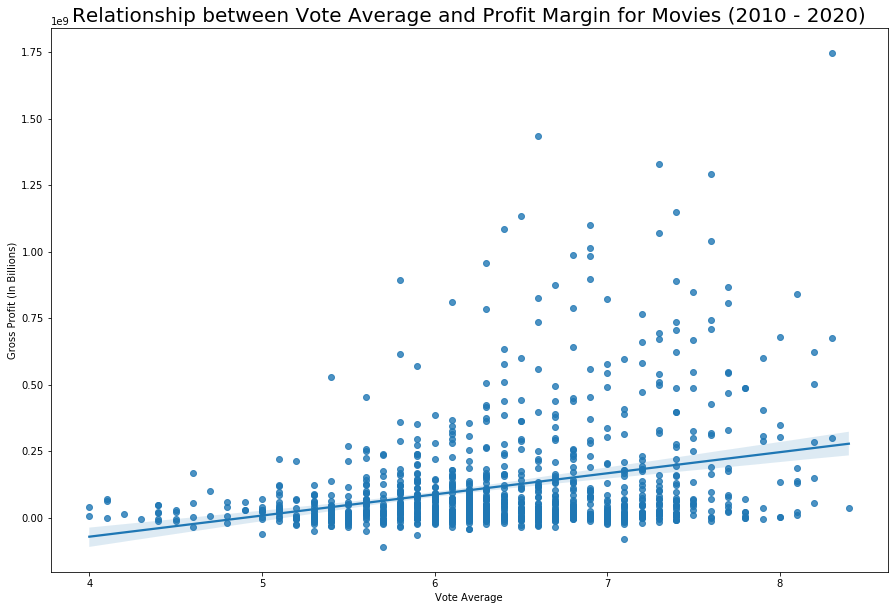

In [34]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})


plt.figure(figsize=(15,10))
ax = sns.regplot(x='vote_average',y='gross_profit',data=merged_data)
ax.set(xlabel='Vote Average', ylabel='Gross Profit (In Billions)')
plt.title('Relationship between Vote Average and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()



In [35]:
correlation = merged_data['vote_average'].corr(merged_data['gross_profit'])
correlation

0.2965503449562171

### Plotting Relationship between Popularity and Profit Margin

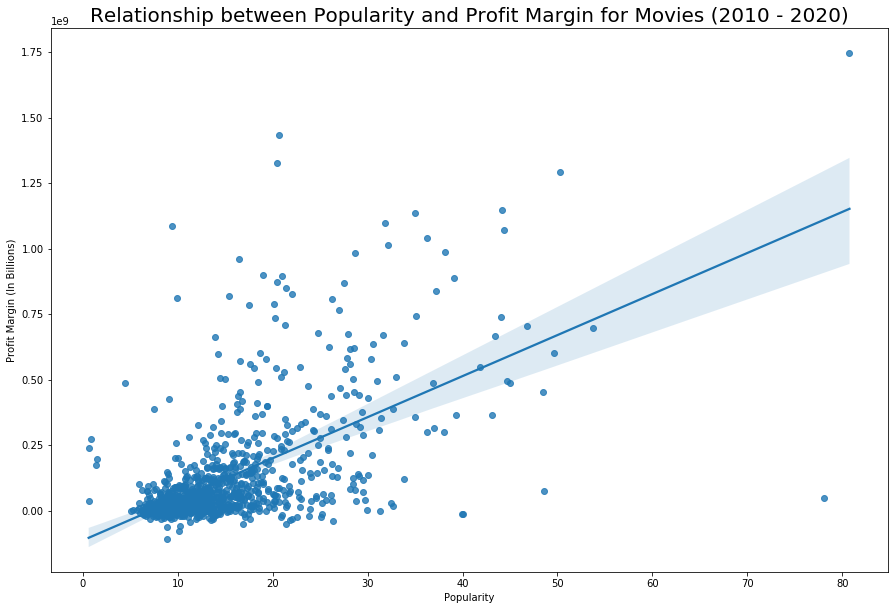

In [36]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
ax = sns.regplot(x='popularity',y='gross_profit',data=merged_data)
ax.set(xlabel='Popularity', ylabel='Profit Margin (In Billions)')
plt.title('Relationship between Popularity and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()

In [37]:
correlation = merged_data['popularity'].corr(merged_data['gross_profit'])
correlation

0.5998378051823429

### Q3 - Conclusion

All three relationships have positive relationships.

- Popularity and Vote Average (0.22)
- Vote Average and Profit Margin (0.30)
- Popularity and Profit Margin (0.60)

Popularity and Profit Margin had the highest correlation among the three relationships. As a movie's popularity increases, profit margin will increase.